In [1]:
import matplotlib.pyplot as plt
import functools

In [2]:
def make_dims(large):
    return (1000,int(large))

In [3]:
def split_algo(dims, idx, max_bytes):
    primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327, 1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427, 1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471, 1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523, 1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579, 1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621, 1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697, 1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753, 1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823, 1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879, 1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999]
    
    size = dims[idx]
    full_size_bytes = 8 * functools.reduce(lambda a, b: a * b, dims)
    max_size = max_bytes * size // full_size_bytes

    def fold(factors, offset, current, best):
        if offset >= len(primes):
            return best
        else:
            if factors[offset] > 0:
                current_prime = primes[offset] * current
                if size // current_prime <= max_size and current_prime < best:
                    best = current_prime
                factors[offset] -= 1
                best = fold(factors, offset, current_prime, best)
                factors[offset] += 1
            return fold(factors, offset + 1, current, best)
    
    factors = [0 for _ in range(len(primes))]
    tmp = size
    for i in range(len(primes)):
        while tmp % primes[i] == 0:
            factors[i] += 1
            tmp /= primes[i]
    
    return size // fold(factors, 0, 1, size)

In [4]:
gb = 1000000000

In [5]:
split_algo(make_dims(1373017), 1, 1 * gb)

1987

In [6]:
limit = 1*gb

In [7]:
# dataset_sizes = [n for n in range(1373017 - 10000, 1373017 + 10000)]
dataset_sizes = [n for n in range(1*gb - 10000, 1*gb + 10000)]
len(dataset_sizes)

20000

In [8]:
split_sizes   = [split_algo(make_dims(n), 1, limit) for n in dataset_sizes]

In [9]:
full_sizes    = [1000 * n for n in dataset_sizes]

In [29]:
sizes_sorted = sorted([8 * 1000 * s for s in split_sizes])
sizes_sorted[len(sizes_sorted)]

999992000

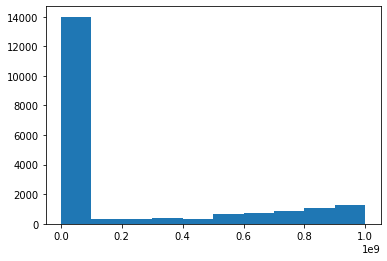

In [36]:
plt.hist(sizes_sorted, 10)
plt.show()

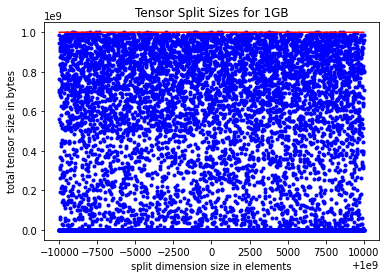

In [22]:
plt.plot(dataset_sizes, [8 * 1000 * s for s in split_sizes], ".b")
# plt.plot([1373017], [8 * 1000 * split_algo(make_dims(1373017), 1, limit)], "or") # house electric
#plt.plot(dataset_sizes, full_sizes, "or")
plt.title("Tensor Split Sizes for 1GB")
plt.xlabel("split dimension size in elements")
plt.ylabel("total tensor size in bytes")
plt.plot(dataset_sizes, [limit for _ in dataset_sizes], "-r")
#plt.show()
plt.savefig("split_sizes.png", dpi=300)

## Plots of memory

In [31]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `